# Human Factors Prediction Model (LSTM) + LS (Hybrid)

## Import Notebook

In [9]:
%run notebook_model_ls.ipynb
%run notebook_model_lstm.ipynb

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/lasanthalakmal/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/lasanthalakmal/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/lasanthalakmal/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/lasanthalakmal/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [6]:
from sklearn.metrics import f1_score, accuracy_score, hamming_loss

def show_accuracy(model):

    y_true = model.Y_test
    y_pred = model.Y_pred

    accuracy = accuracy_score(y_true, y_pred)

    # code adapted from (F1_Score, n.d.)
    macro_f1_score = f1_score(y_true, y_pred, average='macro')
    micro_f1_score = f1_score(y_true, y_pred, average='micro')
    weighted_f1_score = f1_score(y_true, y_pred, average='weighted')
    # end of adapted code

    hamming_loss_value = hamming_loss(y_true, y_pred)

    print(f'Accuracy: {(accuracy*100):.2f}')
    print(f'Micro F1 Score: {(micro_f1_score*100):.2f}')
    print(f'Macro F1 Score: {(macro_f1_score*100):.2f}')
    print(f'Weighted F1 Score: {(weighted_f1_score*100):.2f}')
    print(f'Hamming Loss: {hamming_loss_value:.4f}')

## ASRS

In [8]:
options = {
    "sample_size": 0, 
    "max_length": 200, 
    "max_nb_words": 20000, 
    "is_enable_smote": False,
    "ls_name": 'asrs_ntsb',
    "ls_version": 2
}

# 01. Get Data
asrs_df = CoreUtils.get_data('asrs', from_year=2023, to_year=2023)
dfs = { 'asrs': asrs_df }

# 02. Train Model
lstm_ntsb_Model = LSTMModel(dfs, ds_name='asrs', options=options)
lstm_ntsb_Model.train()

# 03. Evaluate Model
evaluate_result = lstm_ntsb_Model.evaluate()

KeyError: 'is_enable_class_weight'

## NTSB

Start labelling
Model and vectorizer loaded successfully
LS sample_size==== 0
Factors Null count 0
Ladled Sampling size= (4395, 7)
start pre_process_df
combined_narrative
clean_feature
drop_narratives
preprocess_narrative
event_id                        0
date                            0
finding_factor                  0
finding_description             0
HFACS_Category_Value_Predict    0
narrative                       0
narrative_length                0
narrative_word_count            0
narrative_sentence_count        0
dtype: int64
             event_id        date  \
14127  20180102X44607  2018-01-01   
14130  20180102X11535  2018-01-01   
14132  20180101X32947  2018-01-01   
14135  20180108X90308  2018-01-01   
14137  20180109X45300  2018-01-01   

                                          finding_factor  \
14127      Aircraft-Aircraft systems-Landing gear system   
14130  Personnel issues-Psychological-Perception/orie...   
14132      Aircraft-Aircraft systems-Landing gear system

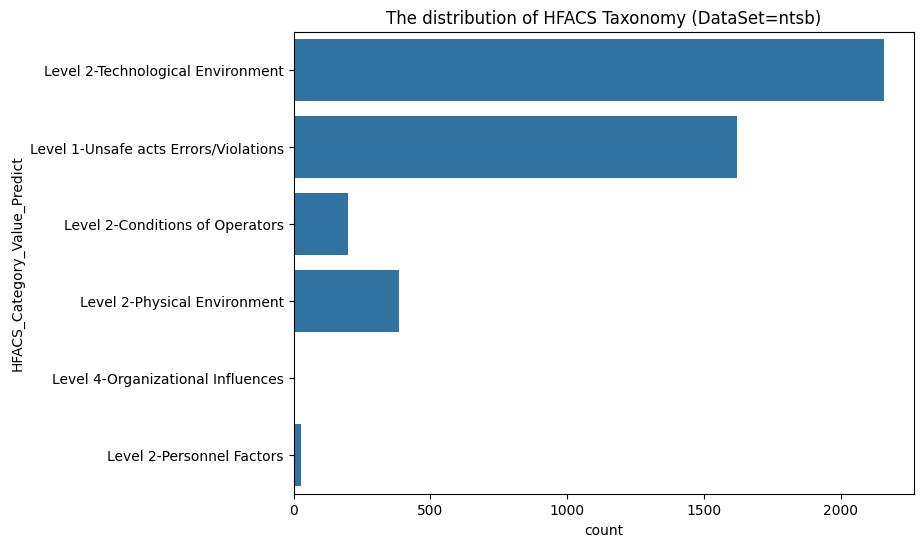

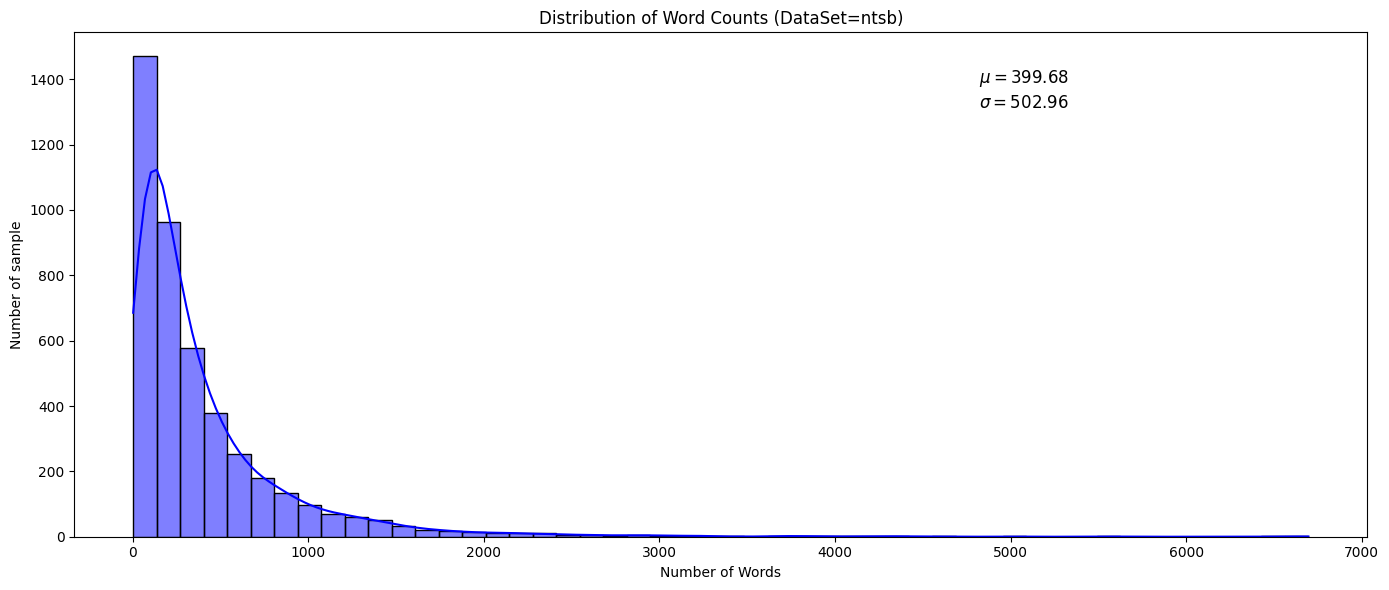

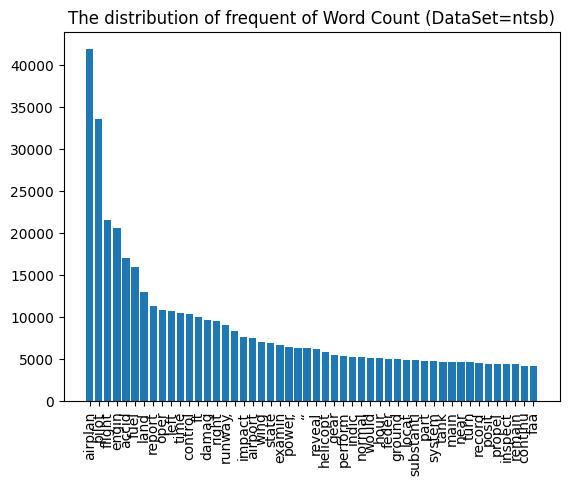

Total unique words: 49302
Define Y
Shape of label tensor: (4395,)
Define X
Found 49303 unique tokens.
Shape of data tensor: (4395, 200)
(3076, 200) (3076,)
(1319, 200) (1319,)
4    649
0    477
3    107
1     74
2     11
5      1
Name: count, dtype: int64
Epoch 1/10
87/87 ━━━━━━━━━━━━━━━━━━━━ 19s 171ms/step - accuracy: 0.3873 - loss: 1.7537 - val_accuracy: 0.4805 - val_loss: 1.1452
Epoch 2/10
87/87 ━━━━━━━━━━━━━━━━━━━━ 16s 183ms/step - accuracy: 0.4794 - loss: 1.1376 - val_accuracy: 0.4805 - val_loss: 1.1115
Epoch 3/10
87/87 ━━━━━━━━━━━━━━━━━━━━ 20s 229ms/step - accuracy: 0.4905 - loss: 1.1171 - val_accuracy: 0.4805 - val_loss: 1.1034
Epoch 4/10
87/87 ━━━━━━━━━━━━━━━━━━━━ 19s 220ms/step - accuracy: 0.4850 - loss: 1.1081 - val_accuracy: 0.4805 - val_loss: 1.1003
Epoch 5/10
87/87 ━━━━━━━━━━━━━━━━━━━━ 24s 274ms/step - accuracy: 0.5038 - loss: 1.1159 - val_accuracy: 0.4805 - val_loss: 1.0981
Epoch 6/10
87/87 ━━━━━━━━━━━━━━━━━━━━ 25s 289ms/step - accuracy: 0.4931 - loss: 1.1140 - val_accura

/Users/lasanthalakmal/Documents/Chester/Study/Programming/CO7100_Research_Dissertation/ASTAPM_Model/python_modules/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/lasanthalakmal/Documents/Chester/Study/Programming/CO7100_Research_Dissertation/ASTAPM_Model/python_modules/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/lasanthalakmal/Documents/Chester/Study/Programming/CO7100_Research_Dissertation/ASTAPM_Model/python_modules/lib/python3.12/site-packages/sklearn/metric

138/138 ━━━━━━━━━━━━━━━━━━━━ 6s 45ms/step


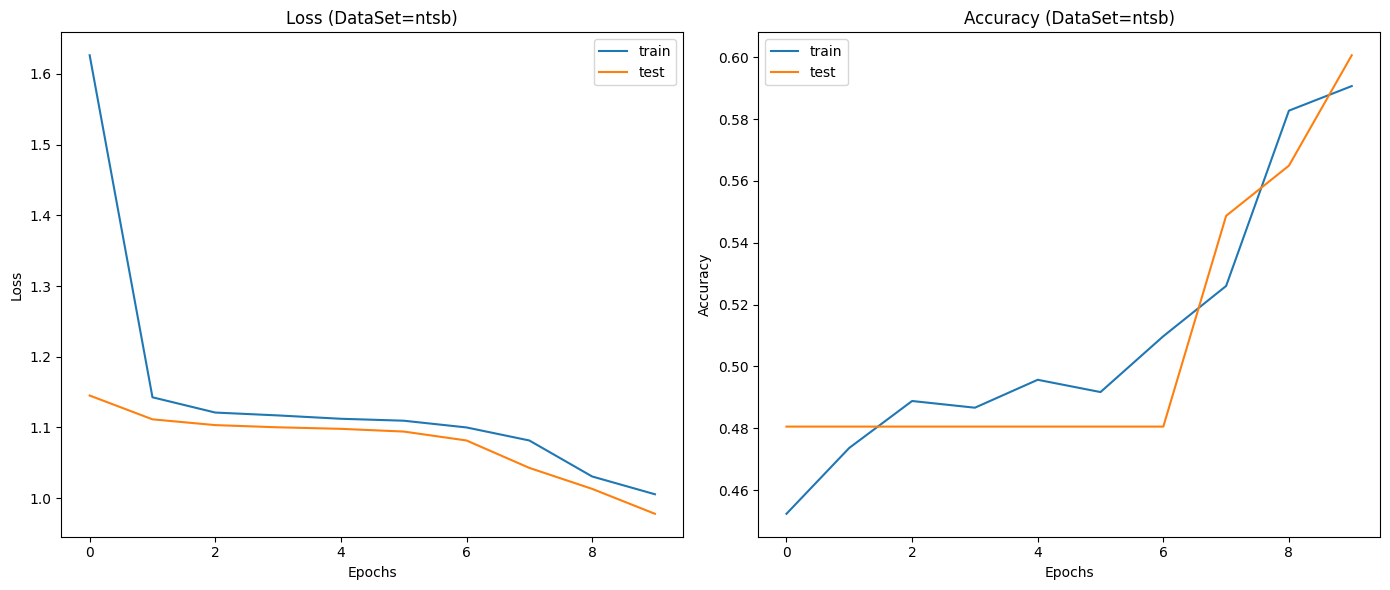

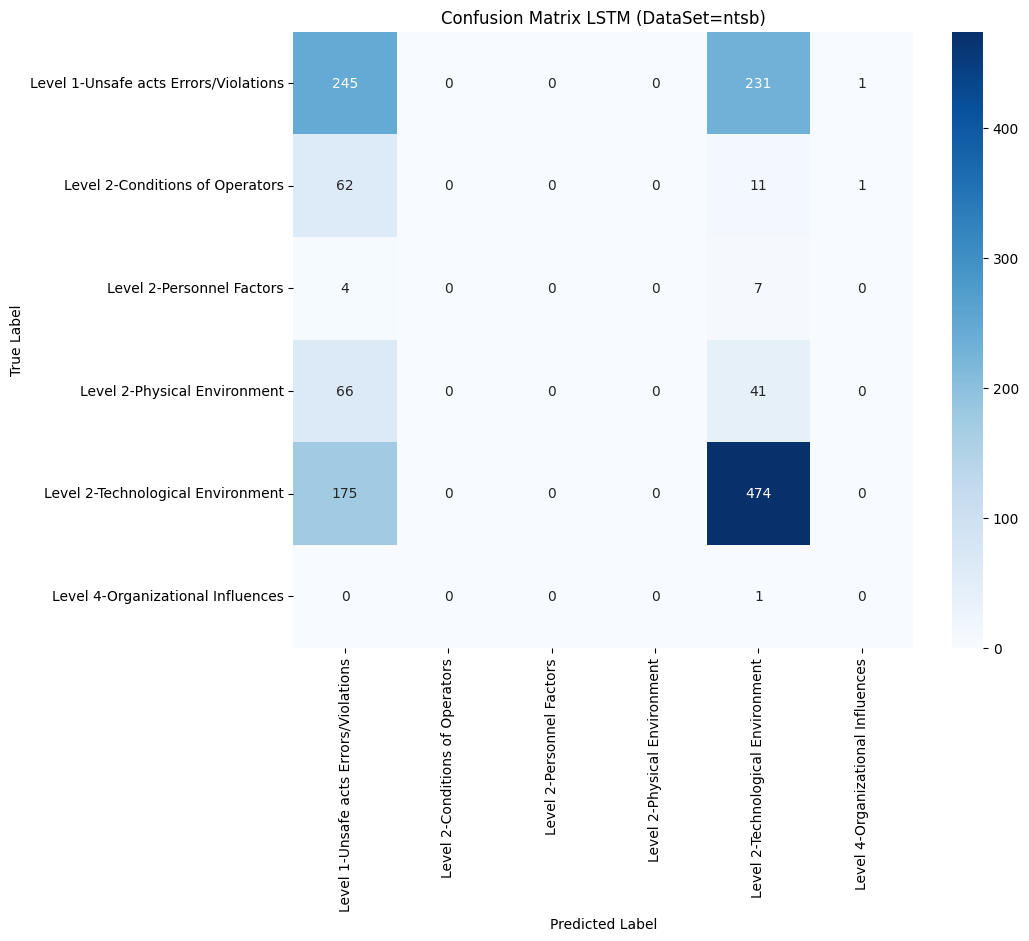

In [14]:
options = {
    "sample_size": 0, 
    "max_length": 200, 
    "max_nb_words": 20000, 
    "is_enable_smote": False,
    "ls_name": 'asrs_ntsb',
    "ls_version": 4
}

# 01. Get Data
ntsb_df = CoreUtils.get_data('ntsb', from_year=2018, to_year=2023)
dfs = { 'ntsb': ntsb_df }

# 04. Train Model
ntsb_lstm_Model = LSTMModel(dfs, ds_name='ntsb', options=options)
ntsb_lstm_Model.train()

# 03. Evaluate Model
ntsb_evaluate_result = ntsb_lstm_Model.evaluate()

## ASRS & NTSB (Combination)

In [24]:
from sklearn.utils import resample

options = {
    "sample_size": 0, 
    "max_length": 300, 
    "max_nb_words": 50000, 
    "is_enable_smote": False,
    "is_enable_class_weight": False,
    "ls_name": 'asrs_ntsb',
    "ls_version": 4
}

# 01. Get Data
asrs_df = CoreUtils.get_data('asrs', from_year=2023, to_year=2023)
asrs_df.sort_values(by='date', ascending=False, inplace=True)
asrs_df = asrs_df.head(4000)
asrs_df = ModelLS.predict(asrs_df, 'asrs_ntsb', 4, 0)
n_samples = 100

asrs_df = asrs_df.groupby('HFACS_Category_Value_Predict').apply(
    lambda x: x.sample(n=min(len(x), n_samples), random_state=42)).reset_index(drop=True)

asrs_df['HFACS_Category_Value_Predict'].value_counts()

# # asrs_df = asrs_df.groupby('HFACS_Category_Value_Predict', group_keys=False).apply(
# #     lambda x: resample(x, n_samples=200, random_state=42)).reset_index(drop=True)

# ntsb_df = CoreUtils.get_data('ntsb', from_year=2018, to_year=2023)
# # ntsb_df.sort_values(by='date', ascending=False, inplace=True)
# # ntsb_df = ntsb_df.head(4000)
# # ntsb_df = ModelLS.predict(ntsb_df, 'asrs_ntsb', 4, 0)
# # ntsb_df = asrs_df.groupby('HFACS_Category_Value_Predict', group_keys=False).apply(
# #     lambda x: resample(x, n_samples=200, random_state=42)).reset_index(drop=True)

# asrs_ntsb_df =  pd.concat([asrs_df, ntsb_df], axis=0).reset_index(drop=True)
# asrs_ntsb_df.sort_values(by='date', inplace=True)
# dfs = { 'asrs_ntsb': asrs_ntsb_df }

# # 02. Train Model
# asrs_ntsb_lstm_Model = LSTMModel(dfs, ds_name='asrs_ntsb', options=options)

# class_weights = {
#     0: 0.7,  # Lower weight for majority class (Level 1)
#     1: 1.0,  # Moderate weight for Level 2 classes
#     2: 1.5,  # Higher weight for Level 2 - Personnel Factors
#     3: 1.8,  # Further increase for Level 2 - Physical Environment
#     4: 0.6,  # Lower weight for Level 2 - Technological Environment (over-represented)
#     5: 2.0   # Highest weight for the under-represented class (Level 4)
# }
# asrs_ntsb_lstm_Model.train(epochs=10, batch_size=32, class_weights_dict=None)

# # 02. Evaluate Model
# asrs_ntsb_evaluate_result = asrs_ntsb_lstm_Model.evaluate()

Model and vectorizer loaded successfully
LS sample_size==== 0
Factors Null count 0


/var/folders/__/wffwy8dx6l53rqlg01sth6th0000gn/T/ipykernel_55926/1218139034.py:20: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  asrs_df = asrs_df.groupby('HFACS_Category_Value_Predict').apply(


HFACS_Category_Value_Predict
Level 1-Decision & Perceptual Errors/Violations    100
Level 1-Skill-based Errors                         100
Level 2-Conditions of Operators                    100
Level 2-Personnel Factors                          100
Level 2-Physical Environment                       100
Level 4-Organizational Influences                  100
Level 2-Technological Environment                   24
Name: count, dtype: int64

In [110]:
from sklearn.utils import resample

# 01. Get Data
asrs_df = CoreUtils.get_data('asrs', from_year=2023, to_year=2023)
# asrs_df.sort_values(by='date', ascending=False, inplace=True)
# asrs_df = asrs_df.head(100)
asrs_df = ModelLS.predict(asrs_df, 'asrs', 4, 0)
asrs_df = asrs_df.groupby('HFACS_Category_Value_Predict', include_groups=False).apply(
    lambda x: resample(x, n_samples=100, random_state=42)).reset_index(drop=True)

# sampled_data1

# ntsb_df = CoreUtils.get_data('ntsb', from_year=2018, to_year=2023)
# ntsb_df.sort_values(by='date', ascending=False, inplace=True)
# ntsb_df = ntsb_df.head(100)


Model and vectorizer loaded successfully
LS sample_size==== 0
Factors Null count 0


/var/folders/__/wffwy8dx6l53rqlg01sth6th0000gn/T/ipykernel_97684/849756465.py:9: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  sampled_data1 = asrs_df_labeled.groupby('HFACS_Category_Value_Predict').apply(lambda x: resample(x, n_samples=100, random_state=42)).reset_index(drop=True)


,event_id,date,finding_factor,finding_description,narrative_01,narrative_02,HFACS_Category_Value_Predict
0,1975266,2023-02-01,Troubleshooting,Aircraft-Human Factors; Aircraft-Troubleshooting,On Day 0; I departed ZZZ for ZZZ1. Conditions ...,NaN,Level 1-Unsafe acts Errors/Violations
1,2014567,2023-07-01,Troubleshooting,Aircraft-Aircraft-Troubleshooting; Workload,I was flying inbound to Stinson airport and ha...,NaN,Level 1-Unsafe acts Errors/Violations
2,1992728,2023-04-01,Troubleshooting,Aircraft-MEL; Procedure; Human Factors; Aircra...,On a climb out of ZZZ I encountered an uncontr...,NaN,Level 1-Unsafe acts Errors/Violations
3,1975583,2023-02-01,Troubleshooting,Aircraft-Human Factors; Aircraft-Troubleshooting,AP (Auto Pilot) Trim Light came on and then we...,Upon initial descent into ZZZZ on the ZZZZZ ar...,Level 1-Unsafe acts Errors/Violations
4,1971048,2023-02-01,Troubleshooting,Aircraft-Aircraft-Troubleshooting; Workload,This report is regarding a VFR General Aviatio...,NaN,Level 1-Unsafe acts Errors/Violations
...,...,...,...,...,...,...,...
595,1977521,2023-02-01,Procedure,Aircraft-Procedure; Aircraft,While at cruise we got multiple ECAMS. Nose st...,NaN,Level 4-Organizational Influences
596,2034911,2023-09-01,Chart Or Publication,Chart Or Publication-Chart Or Publication; Pro...,I was approached with a question regarding the...,NaN,Level 4-Organizational Influences
597,2066114,2023-12-01,Situational Awareness,ATC Equipment / Nav Facility / Buildings-ATC E...,GMU Runway 19 PAPI appears to be mis-aligned. ...,NaN,Level 4-Organizational Influences
598,2022985,2023-07-01,ATC Equipment / Nav Facility / Buildings,Ambiguous-ATC Equipment / Nav Facility / Build...,PIT approach control cleared us to WYLER in or...,On an intercept heading for the ILS 32 into PI...,Level 4-Organizational Influences


## Summary of Accuracy

In [22]:
# Show Accuracy
# print('ASRS=========')
# show_accuracy(asrs_lstm_Model)
# print('NTSB=========')
# show_accuracy(ntsb_lstm_Model)
print('ASRS_NTSB=========')
show_accuracy(asrs_ntsb_lstm_Model)

ASRS_NTSB=========
Accuracy: 39.69
Micro F1 Score: 39.69
Macro F1 Score: 25.48
Weighted F1 Score: 32.65
Hamming Loss: 0.6031
